<a href="https://colab.research.google.com/github/kholiqhidayat/Praktikum-Data-Mining-smt4/blob/main/G_231_22_0097uas_supervised_K_Nearest_Neighbors_%26_unsupervised_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.85      0.85      0.85        26

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Confusion Matrix:


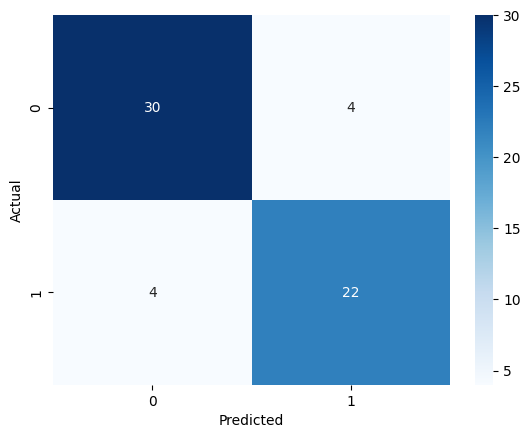

<ipython-input-11-c778de0c586e>:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=100, label='Actual')


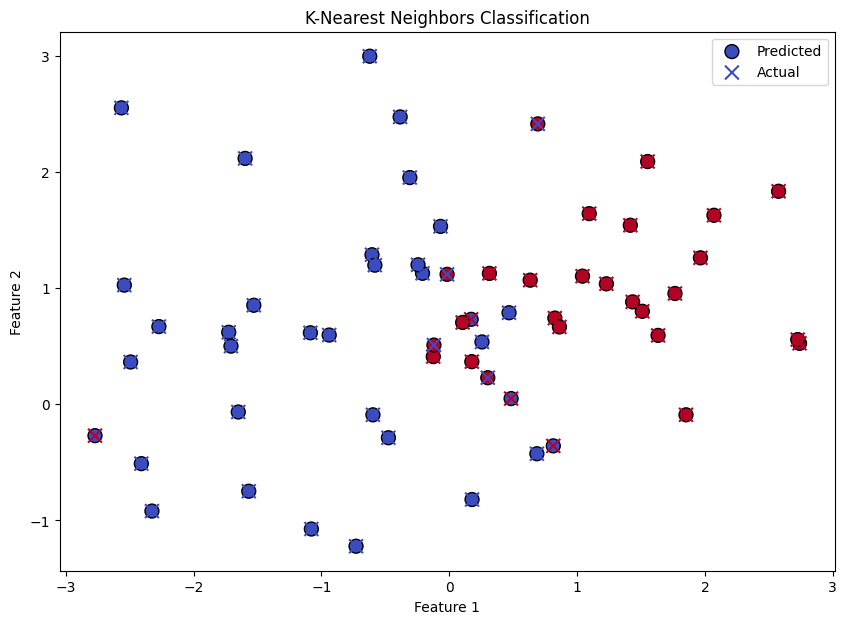

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Membuat dataset sintetis
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model K-Nearest Neighbors dengan K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn.fit(X_train, y_train)

# Memprediksi data uji
y_pred = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi hasil klasifikasi
plt.figure(figsize=(10, 7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k', s=100, label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=100, label='Actual')
plt.title('K-Nearest Neighbors Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()


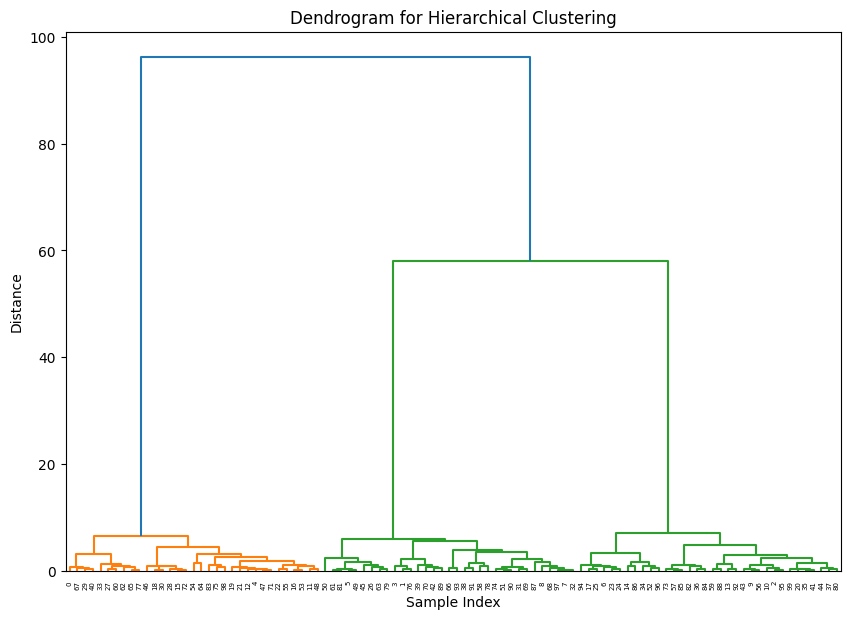

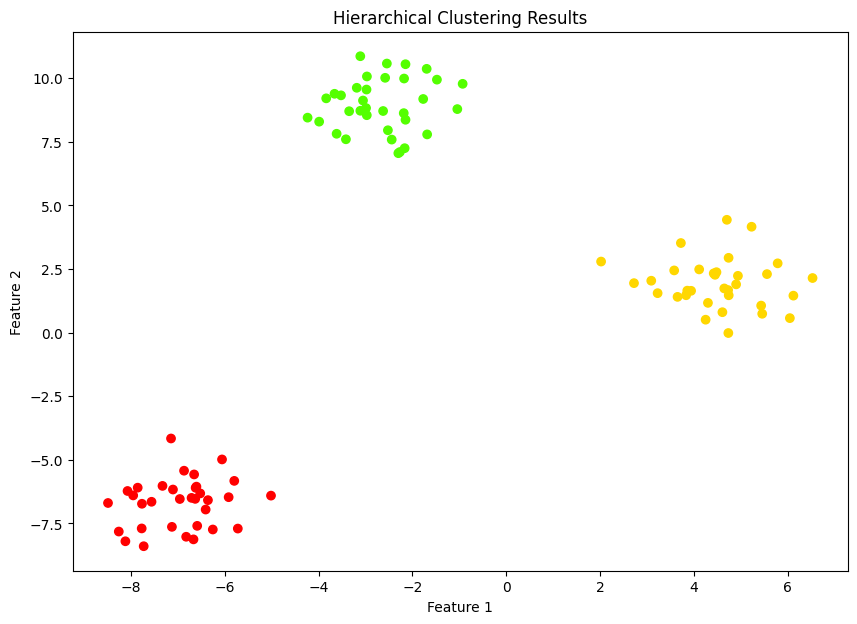

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Membuat dataset sintetis
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Melakukan hierarchical clustering menggunakan metode 'ward'
Z = linkage(X, method='ward')

# Membuat dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Memotong dendrogram untuk mendapatkan cluster
from scipy.cluster.hierarchy import fcluster

# Menentukan jumlah cluster yang diinginkan, misalnya 3
max_d = 7.5  # atau gunakan nilai threshold untuk jarak
clusters = fcluster(Z, max_d, criterion='distance')

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')  # prism atau tab20c untuk lebih dari 10 cluster
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
